# Regression diagnostics: validating assumptions for linear models

For interpretation of the regression outputs that we learned earlier, some assumptions have to hold for those interpretations to be true. There are some assumptions that we can validate, and some we can't.

1. The model that relates the response to the predictors is assumed to be linear in the regression parameters beta0, beta1 and so on to betap. When the linearity assumption does not hold, transformation of the data can sometimes lead to linearity
2. The errors are normally distributed with a mean of 0
3. The error terms have a constant variance, or are homoscedastic in other terms
4. The predictor variables are linearly independant of each other

The normality of error terms and heteroscedasticity can simply be observed by quantil-quantile plots, and residuals against fitted, or residuals against predictor plots, respectively.

We also have to make sure that in fitting the model, the fit is not overly determined by one, or a few observations. To elaborate, we will take a look at an example dataset of New York rivers. The dataset consists of Nitrogen concentration measurements in each river indicating how polluted the water is, along with the four other variables indicating the proportion of land surrounding the river in a particular use, e.g commercial/industrial, residential, etc.

The diagnostic process involves investigating univariate and bivariate plots of predictors and response variables, as well as residual and influence measure plots. All are important in their own right, and what one method can reveal would not necessarily be visible in another.

In [7]:
library(ggplot2, quietly = TRUE)
df_newYorkRivers <- read.table("regressionDatasets/newYorkRivers.txt",
                               header = TRUE, sep = '\t')
df_newYorkRivers

River,Agr,Forest,Rsdntial,ComIndl,Nitrogen
Olean,26,63,1.2,0.29,1.10
Cassadaga,29,57,0.7,0.09,1.01
Oatka,54,26,1.8,0.58,1.90
Neversink,2,84,1.9,1.98,1.00
Hackensack,3,27,29.4,3.11,1.99
Wappinger,19,61,3.4,0.56,1.42
Fishkill,16,60,5.6,1.11,2.04
Honeoye,40,43,1.3,0.24,1.65
Susquehanna,28,62,1.1,0.15,1.01
Chenango,26,60,0.9,0.23,1.21


Make univariate plots of each variable, like boxplots and histograms and try to identify rivers that have values in some variables that seem different from the majority. The commands to make these plots are given below for one of the variables:

boxplot(df_newYorkRivers$ComIndl)
hist(df_newYorkRivers$ComIndl)

The river Hackensack seems to have extreme observations for Commercial and Industrial, and residential land usage, and the River Neversink for Commercial and Industrial. To illustrate what we meant by "the fit being overly determined by one or a few observations", we will fit a regression model for Nitrogen against all of the four predictors, then fit the same without the Neversink river, then fit the same without Hackensack, and take a look at the coefficients returned.

In [5]:
lm_newYorkRivers <- lm(Nitrogen ~ ., data = df_newYorkRivers[,2:6])
lm_riversNotNeversink <- update(lm_newYorkRivers, subset = -4)
lm_riversNotHackensack <- update(lm_newYorkRivers, subset = -5)

summary(lm_newYorkRivers)
summary(lm_riversNotNeversink)
summary(lm_riversNotHackensack)


Call:
lm(formula = Nitrogen ~ ., data = df_newYorkRivers[, 2:6])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49404 -0.13180  0.01951  0.08287  0.70480 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.722214   1.234082   1.396   0.1832  
Agr          0.005809   0.015034   0.386   0.7046  
Forest      -0.012968   0.013931  -0.931   0.3667  
Rsdntial    -0.007227   0.033830  -0.214   0.8337  
ComIndl      0.305028   0.163817   1.862   0.0823 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2649 on 15 degrees of freedom
Multiple R-squared:  0.7094,	Adjusted R-squared:  0.6319 
F-statistic: 9.154 on 4 and 15 DF,  p-value: 0.0005963



Call:
lm(formula = Nitrogen ~ ., data = df_newYorkRivers[, 2:6], subset = -4)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36421 -0.11154  0.00406  0.12059  0.26538 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.099471   0.911636   1.206 0.247788    
Agr          0.010137   0.010984   0.923 0.371705    
Forest      -0.007589   0.010222  -0.742 0.470098    
Rsdntial    -0.123793   0.039337  -3.147 0.007134 ** 
ComIndl      1.528956   0.343719   4.448 0.000551 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1925 on 14 degrees of freedom
Multiple R-squared:  0.8557,	Adjusted R-squared:  0.8145 
F-statistic: 20.76 on 4 and 14 DF,  p-value: 9.087e-06



Call:
lm(formula = Nitrogen ~ ., data = df_newYorkRivers[, 2:6], subset = -5)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40124 -0.09184  0.02912  0.10840  0.22493 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.626014   0.781091   2.082  0.05620 . 
Agr          0.002352   0.009539   0.247  0.80881   
Forest      -0.012760   0.008815  -1.448  0.16976   
Rsdntial     0.181161   0.044390   4.081  0.00112 **
ComIndl      0.075618   0.113957   0.664  0.51775   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1676 on 14 degrees of freedom
Multiple R-squared:  0.864,	Adjusted R-squared:  0.8252 
F-statistic: 22.24 on 4 and 14 DF,  p-value: 6.055e-06


Observe that in the full model, none of the coefficients are statistically significant at an alpha of 0.05, but removing the Neversink river from our data, and fitting again (as in the second) results in Residential and Commercial/Industrial variables becoming significant. But also observe that in both cases, Commercial/Industrial seems to be positively correlated with Nitrogen concentration, but Residential seems to be negatively correlated. Meaning, that an increase in the proportion of residential land surrounding a river would result in a decrease in pollution. But if you observe the third model, which is fit on the dataset, excluding Hackensack, the coefficient for Residential becomes positive, which implies the complete opposite!

This shows how only one observation can lead to substantially different results and conclusions. The Neversink and Hackensack Rivers are called influential observations because they influence the regression results substantially more than other observations in the data.

For illustrative purpose, let us consider fitting the simple regression model relating the mean nitrogen concentration, Y, to the percentage of land area in eitherindustrial or commercial use. We have already observed the univariate plots. Let's take a look at the bivariate plot of Nitrogen against ComIndl, overlayed with a line representing the linear model fit:

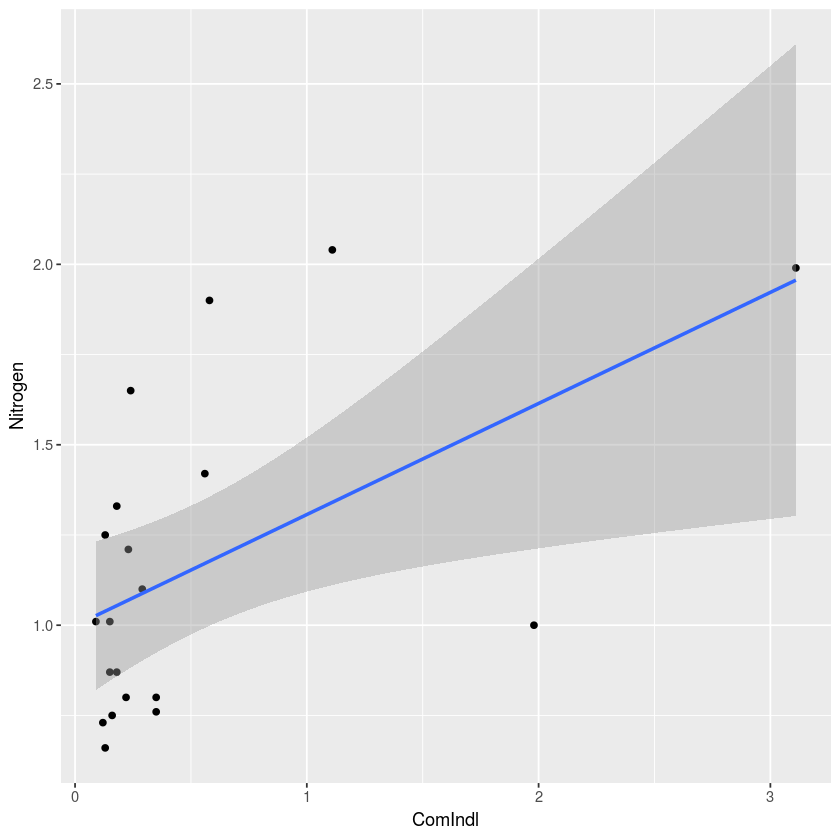

In [8]:
ggplot(df_newYorkRivers, aes(x = ComIndl, y = Nitrogen)) +
    geom_point() +
    geom_smooth(method = 'lm')

Outliers in the response variable can be identified by large residuals, but the Hackensack river has a very small residual. While a small value of the residual is desirable, the reason for the small value of the residual here is not due to a good fit; it is due to the fact that observation 5 is a high-leverage point and, in collaboration with observation 4, they pull the regression line toward them. A very handy plot to check leverage and residuals is the residual-leverage plot in the olsrr package:

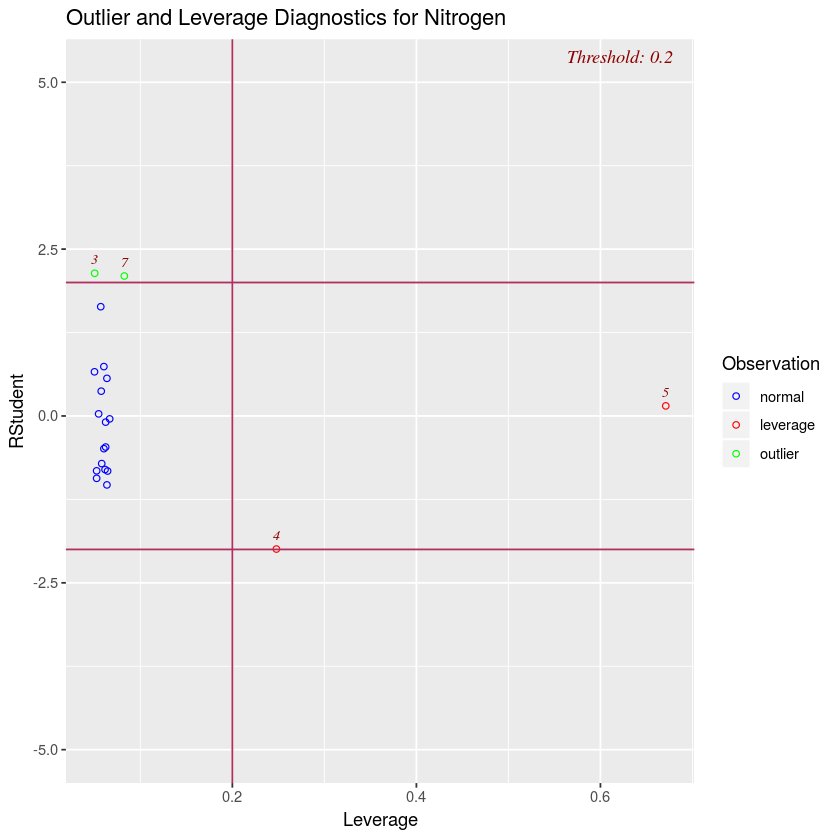

In [11]:
library(car, quietly = TRUE)
library(olsrr, quietly = TRUE)

ols_plot_resid_lev(lm_riversIndstrl)

5, Hackensack has a very small residual (close to zero on the y-axis, but high leverage (x-axis). Compare the points 4, 3 and 7 here with the scatter plot of Nitrogen vs. ComIndl to see what each situation looks like. Also check out the studentised-residual plot using the function ols_plot_resid_stud() from the olsrr library.

We will also see plots for 3 measures of influence, Cook's distance, DFFITS, and Hadi's influence measure, which aim to identify points which have an 'undue' influence on the regression model. Remember: all 3 use different methods of measuring influence, and what can be spotted in one, might not be apparent in another. In some cases, an influential point might not be so apparent in any of the 3, but could be seen in the bivariate plots of the variables themselves. Advice: use at least one of the first two, along with Hadi's measure.

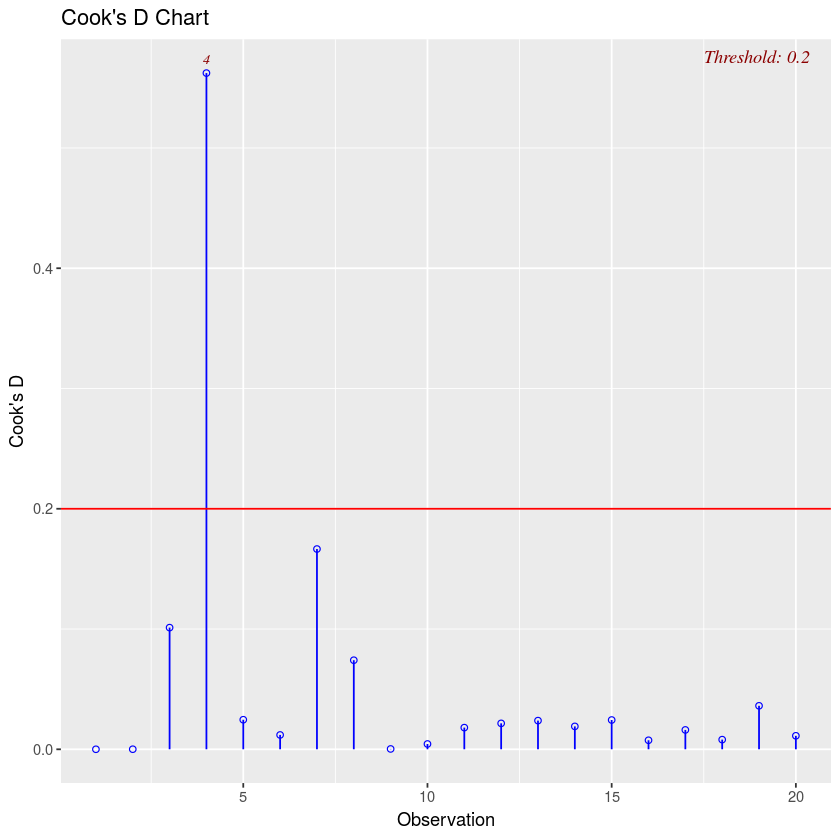

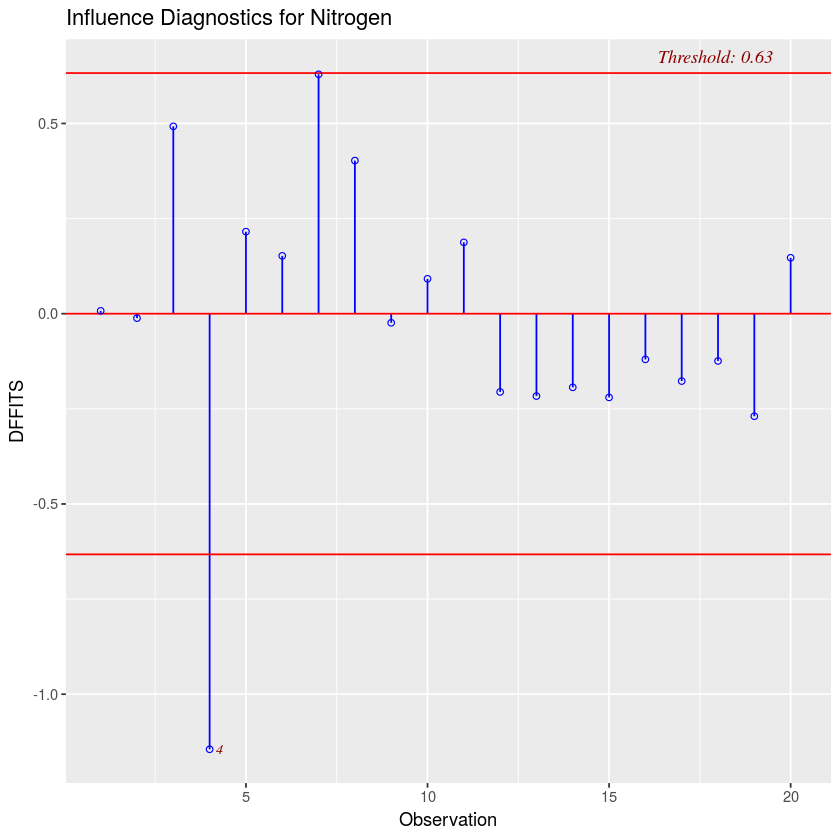

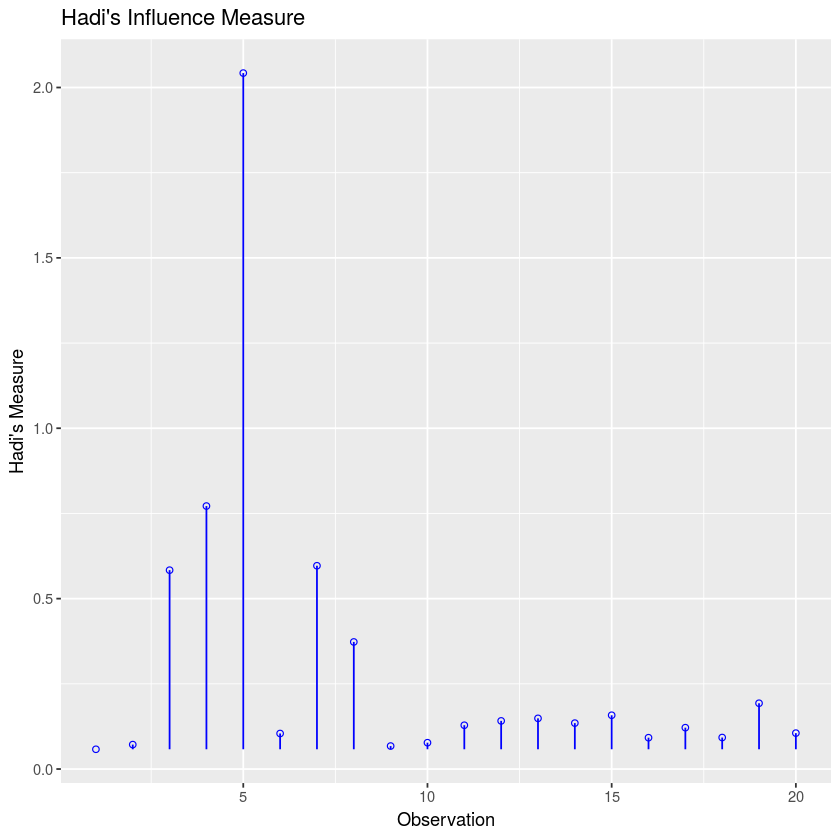

In [12]:
ols_plot_cooksd_chart(lm_riversIndstrl)
ols_plot_dffits(lm_riversIndstrl)
ols_plot_hadi(lm_riversIndstrl)

The first two identified 4, i.e Neversink, and the third identified 5, Hackensack, as being influential points in our model.

## Assignment

Load the anscombe quartet, and make univariate, and bivariate plots of each of the pairs of y's and x's, followed by fitting a linear model, and presenting each of the diagnostic plots used above. Observe how each situation manifests in the plots. 